In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib as jb
from lightgbm import LGBMRegressor
import math
import cv2
import matplotlib.patches as mpatches
import colorsys

In [4]:
data_path = '../data/generated_buckets/'
charts_path = '../charts/error_visualization/kbins_20/'

In [5]:
val_data = jb.load(f'{data_path}val_data_binscoord_20.pkl.z')
val_data

,b1,b2,b3,b4,b5,b6,b7,b8,cspmb7,kbins_coords_x,kbins_coords_y,z,x,y,pred_lgbm,pred_rf
0,0.1199,0.0866,0.0667,0.0464,0.0490,0.0316,0.0283,0.0238,23.382784,0.0,6.0,3.195862,233,1130,3.256394,3.328351
3,0.1199,0.0882,0.0692,0.0452,0.0488,0.0324,0.0281,0.0232,23.158824,0.0,6.0,3.268182,233,1133,2.863485,3.920150
5,0.1196,0.0866,0.0687,0.0451,0.0489,0.0323,0.0285,0.0229,23.607309,0.0,6.0,3.294375,233,1135,2.878180,3.509681
6,0.1196,0.0868,0.0674,0.0451,0.0485,0.0317,0.0296,0.0232,24.852202,0.0,6.0,3.353030,233,1136,2.817091,3.339291
8,0.1224,0.0917,0.0725,0.0509,0.0554,0.0345,0.0331,0.0264,28.922021,0.0,7.0,2.230000,234,1003,2.902302,2.106675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19276,0.1256,0.1026,0.0803,0.0529,0.0436,0.0275,0.0256,0.0217,20.408150,19.0,19.0,3.026562,2290,83,2.450512,3.530705
19277,0.1277,0.1031,0.0824,0.0541,0.0464,0.0281,0.0267,0.0219,21.607165,19.0,19.0,2.920000,2290,84,4.136874,3.976921
19278,0.1277,0.1018,0.0811,0.0550,0.0464,0.0281,0.0267,0.0222,21.607165,19.0,19.0,2.820312,2291,84,4.136874,3.956938
19280,0.1267,0.1026,0.0805,0.0558,0.0473,0.0290,0.0263,0.0239,21.169079,19.0,19.0,2.594444,2292,85,3.668955,2.531088


In [6]:
val_data['z_pred'] = val_data['pred_rf']
val_data.drop(['pred_rf', 'pred_lgbm'], axis=1, inplace=True)
val_data.head()

,b1,b2,b3,b4,b5,b6,b7,b8,cspmb7,kbins_coords_x,kbins_coords_y,z,x,y,z_pred
0,0.1199,0.0866,0.0667,0.0464,0.0490,0.0316,0.0283,0.0238,23.382784,0.0,6.0,3.195862,233,1130,3.328351
3,0.1199,0.0882,0.0692,0.0452,0.0488,0.0324,0.0281,0.0232,23.158824,0.0,6.0,3.268182,233,1133,3.920150
5,0.1196,0.0866,0.0687,0.0451,0.0489,0.0323,0.0285,0.0229,23.607309,0.0,6.0,3.294375,233,1135,3.509681
6,0.1196,0.0868,0.0674,0.0451,0.0485,0.0317,0.0296,0.0232,24.852202,0.0,6.0,3.353030,233,1136,3.339291
8,0.1224,0.0917,0.0725,0.0509,0.0554,0.0345,0.0331,0.0264,28.922021,0.0,7.0,2.230000,234,1003,2.106675


In [7]:
df_data = val_data
df_data['error'] = df_data['z_pred'] - df_data['z']
df_data['abs_error'] = abs(df_data['error'])

In [8]:
df_result = df_data.drop(['b1','b2','b3','b4','b5','b6','b7','b8'],axis=1)

In [9]:
df_result['z_mean_rd'] = df_result['z'].apply(np.floor)

In [13]:
df_depth = df_result.drop(['x','y','z_pred','z', 'kbins_coords_x', 'kbins_coords_y'],axis=1).groupby('z_mean_rd').mean().reset_index()
df_depth.columns = ['depth_round_down','cspm','mean_error','mean_abs_error']

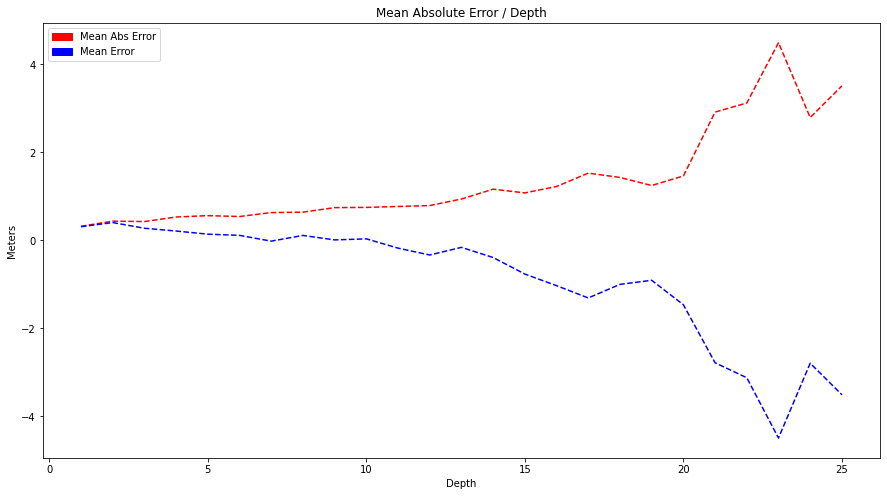

In [14]:
plt.figure(figsize=(15,8))
plt.plot(df_depth['depth_round_down'], df_depth['mean_abs_error'], 'r--', df_depth['depth_round_down'], df_depth['mean_error'], 'b--')
red = mpatches.Patch(color='red', label='Mean Abs Error')
blue = mpatches.Patch(color='blue', label='Mean Error')
plt.legend(handles=[red,blue])
plt.xlabel("Depth")
plt.ylabel("Meters")
plt.savefig(f'{charts_path}chart_mean_error.jpg')
plt.title('Mean Absolute Error / Depth')
#plt.grid()
plt.show()

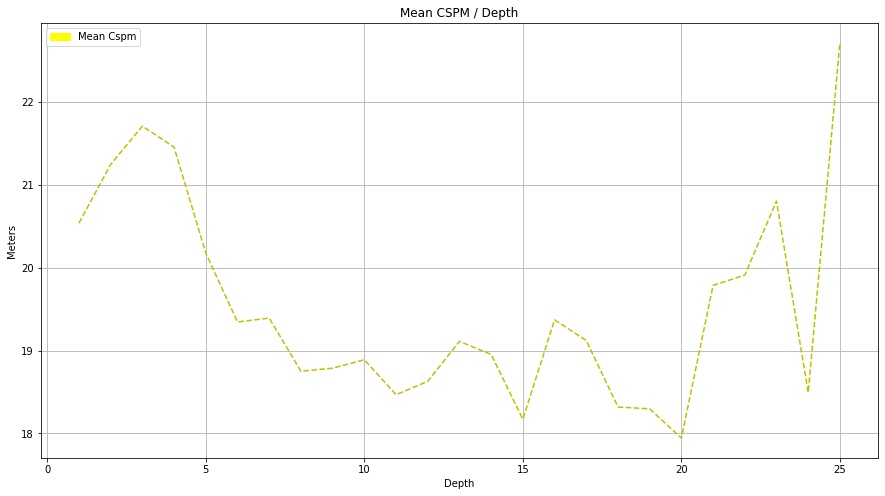

In [15]:
plt.figure(figsize=(15,8))
plt.plot(df_depth['depth_round_down'], df_depth['cspm'], 'y--')
yellow = mpatches.Patch(color='yellow', label='Mean Cspm')
plt.legend(handles=[yellow])
plt.xlabel("Depth")
plt.ylabel("Meters")
plt.savefig(f'{charts_path}chart_mean_cspm.jpg')
plt.title('Mean CSPM / Depth')
plt.grid()
plt.show()

In [16]:
def find_transect(x_s, y_s, x_e, y_e, df):
    transect = list()
    angle = math.atan2(y_s-y_e, x_s-x_e)
    low_x, high_x = (x_s, x_e) if x_s < x_e else (x_e, x_s)
    low_y, high_y = (y_s, y_e) if y_s < y_e else (y_e, y_s)
    df_t = df[(df['x'] >= low_x) & (df['x'] <= high_x)]
    df_t = df_t[(df_t['y'] >= low_y) & (df_t['y'] <= high_y)]
    for i, row in enumerate(df_t.itertuples()):
        #print(row)
        x = row[-5] # change this to dynamic 
        y = row[-4] # change this to dynamic 
        angle2 = math.atan2(y-y_e,x-x_e)
        if abs(angle2 - angle) < 0.05:
            transect.append(row)
    return transect
    

In [27]:
import seaborn as sns
sns.set_style('darkgrid')

In [28]:
def generate_transect_charts(df_data, coords, path, image=None):
    transect = find_transect(coords[0],coords[1],coords[2],coords[3],df_data)
    
    if image is not None:
        transect_image = image.copy()
        for i, row in enumerate(transect):
            x = row[1] # Change this to dynamic
            y = row[2] # change this to dynamic
            transect_image[y][x] = [0,255,0]

        cv2.imwrite(f'{path}bat_single_transect_{coords[0]}_{coords[1]}.jpg',transect_image)

    df_transect = pd.DataFrame(transect)
    #print(df_transect.head())
    df_transect.drop(['Index'], axis=1, inplace=True)
    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],-df_transect['z'], 'r.', df_transect['x'],-df_transect['z_pred'], 'b.')
    red = mpatches.Patch(color='red', label='Bathymetry')
    blue = mpatches.Patch(color='blue', label='Prediction')
    plt.legend(handles=[red,blue])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Depth(m)")
    plt.grid()
    plt.savefig(f'{path}chart_bat_pred_{coords[0]}_{coords[1]}.jpg')

    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],df_transect['error'], 'g.')
    lbl = mpatches.Patch(color='green', label='Error')
    plt.legend(handles=[lbl])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Meter")
    plt.grid()
    plt.savefig(f'{path}chart_error_{coords[0]}_{coords[1]}.jpg')

    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],df_transect['abs_error'], 'm.')
    lbl = mpatches.Patch(color='magenta', label='Abs Error')
    plt.legend(handles=[lbl])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Meter")
    plt.grid()
    plt.savefig(f'{path}chart_abs_error_{coords[0]}_{coords[1]}.jpg')


In [29]:
transect_coords = [[510,410,680,310],
                   [1604,142,1772,440],
                   [871,1123,1190,939],
                   [1020,705,1319,532]]

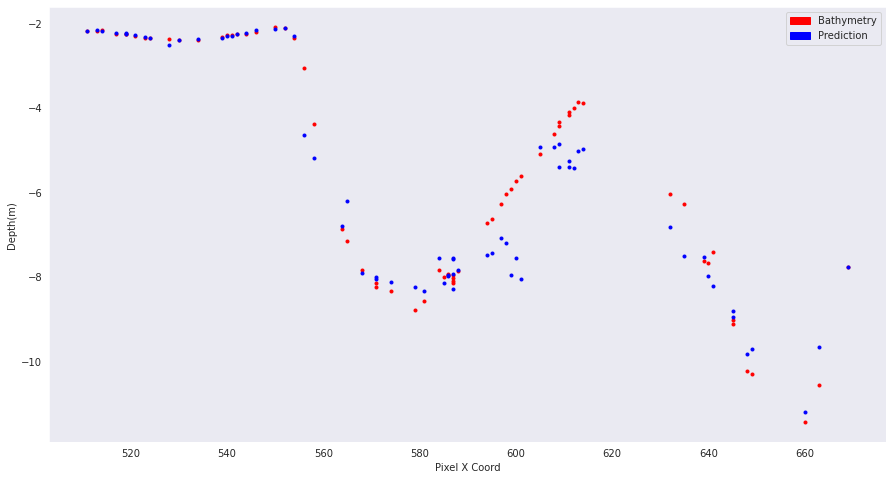

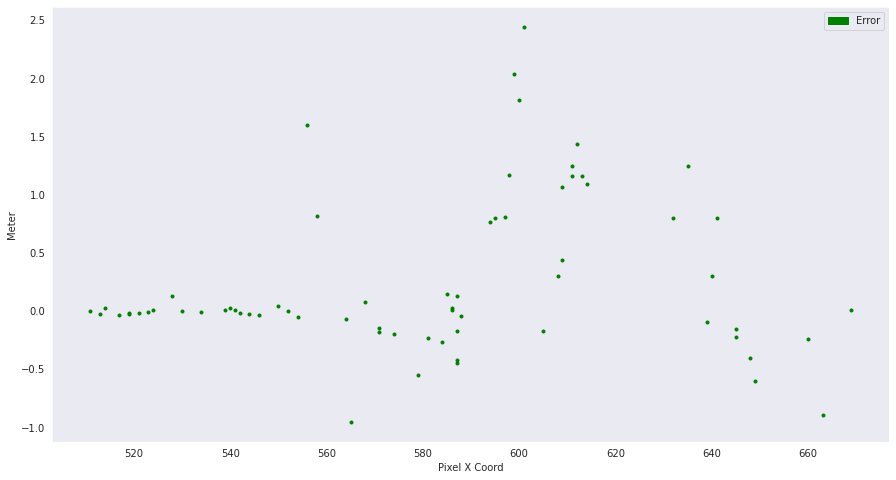

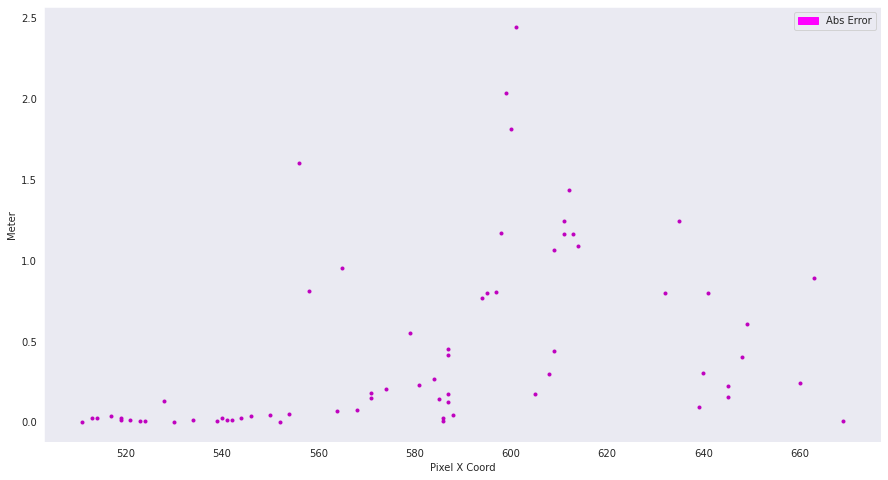

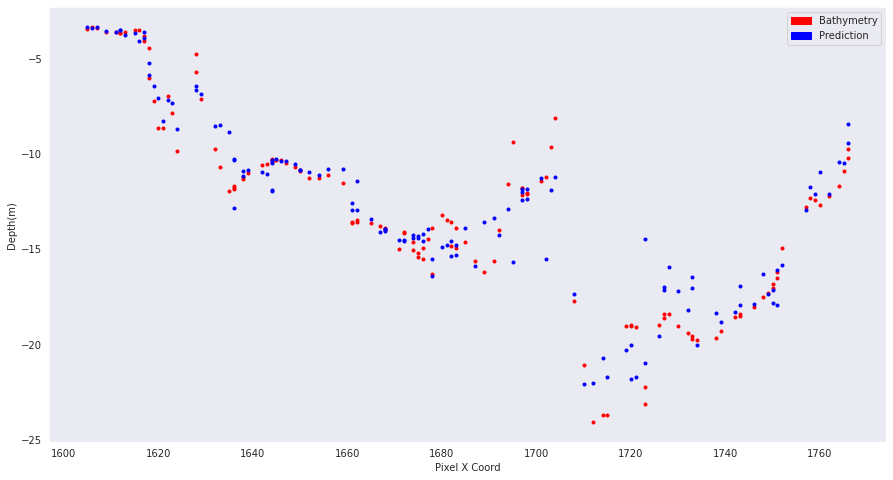

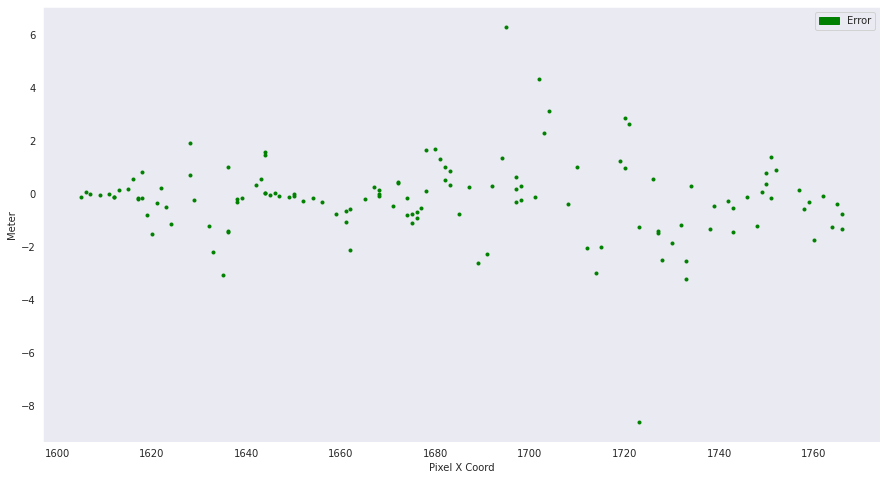

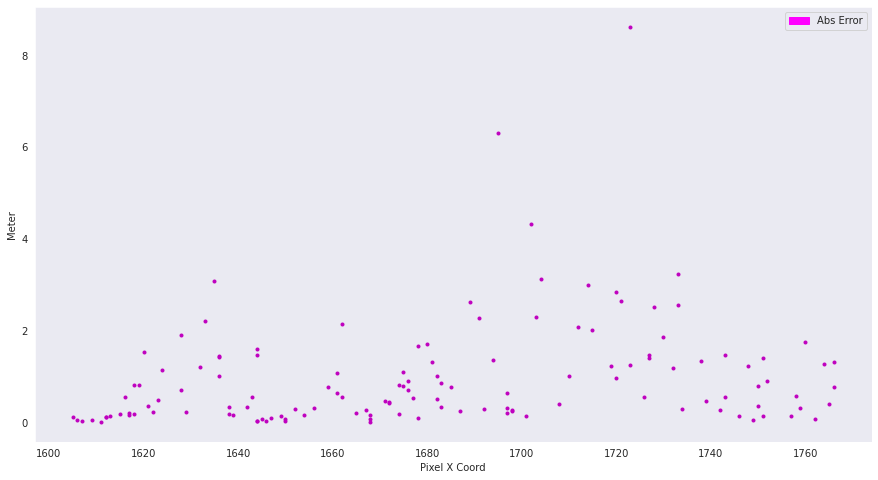

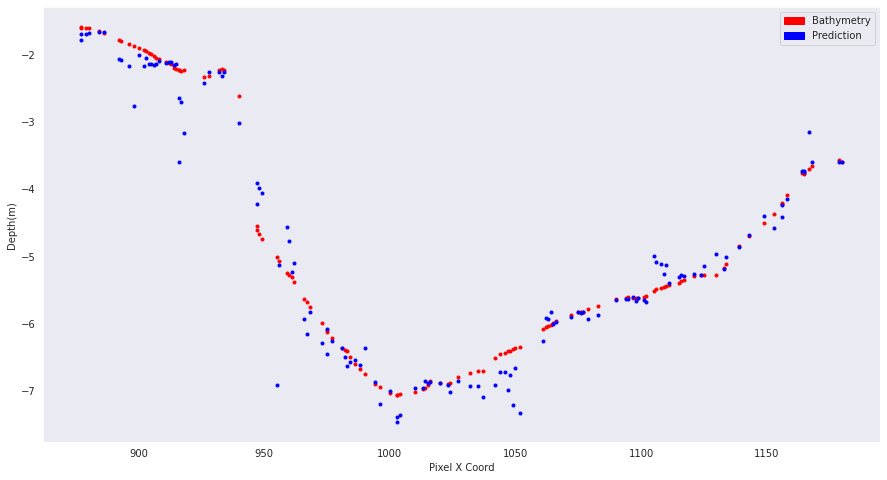

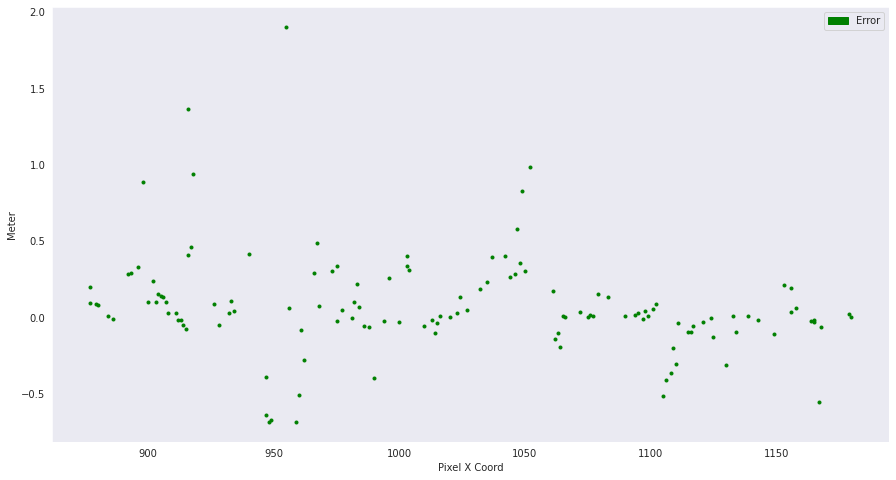

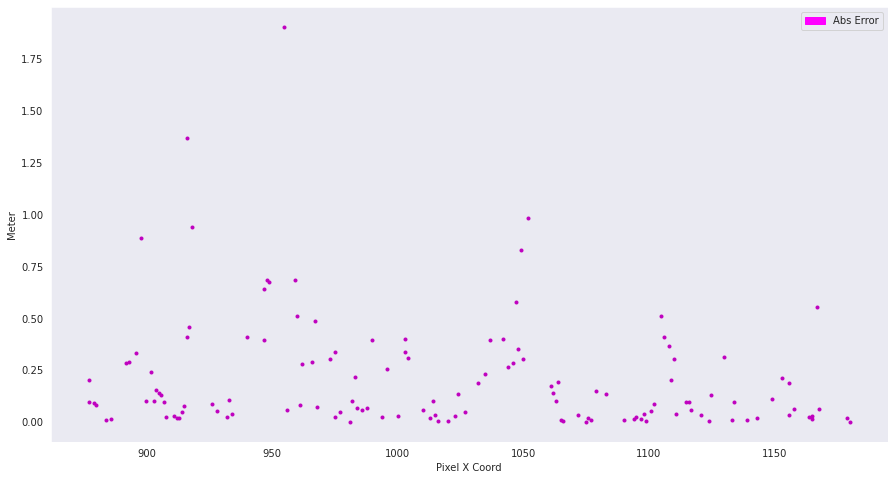

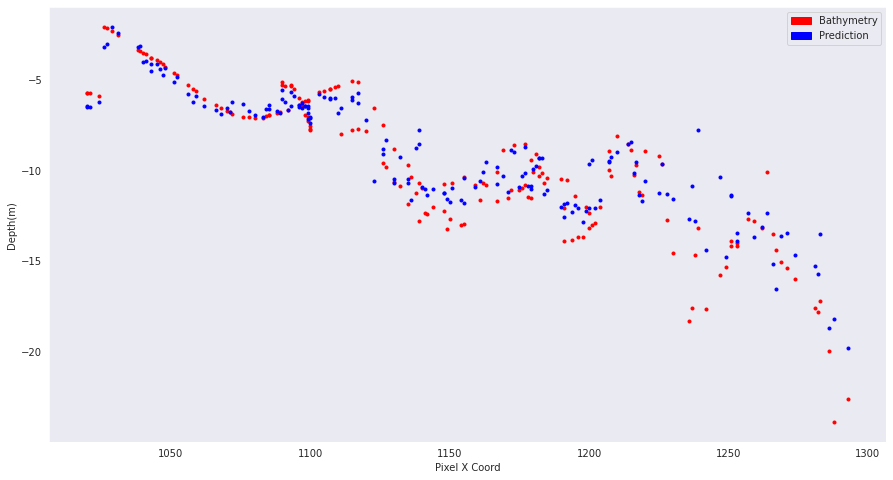

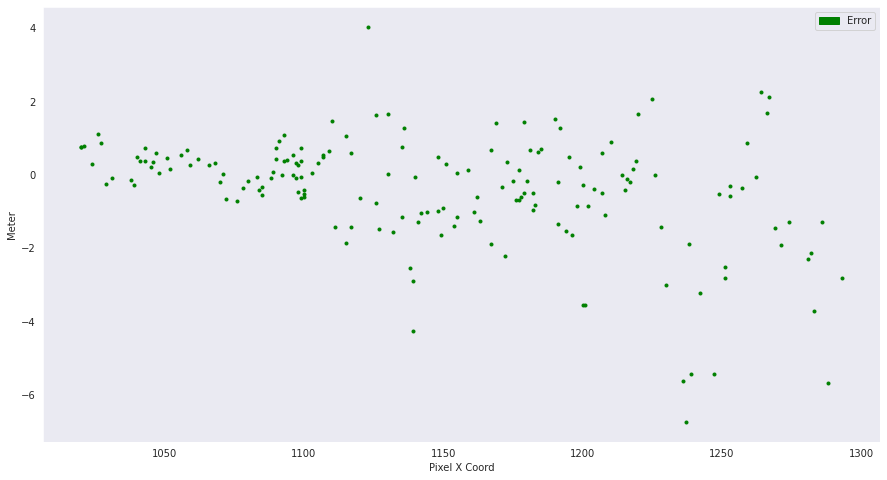

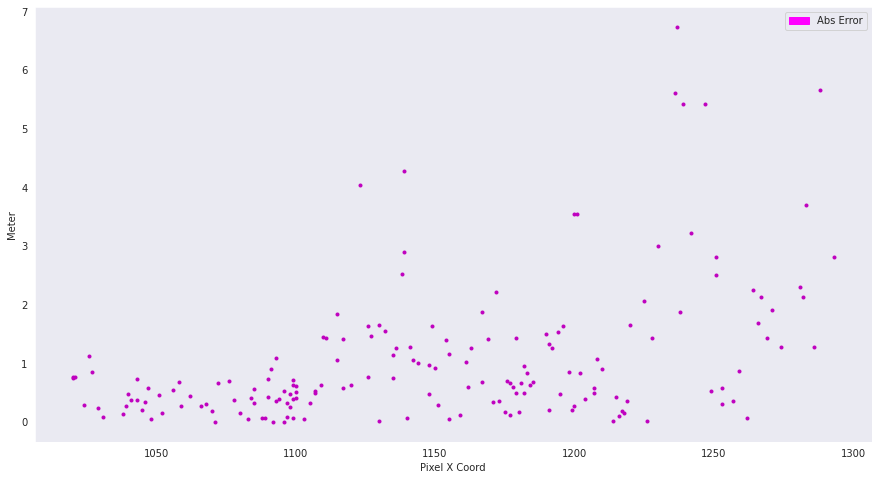

In [30]:
for i, coords in enumerate(transect_coords):
    generate_transect_charts(df_data, coords, charts_path, None)